# Estimate attractor dimension given N dimensional time-series data

In [1]:
import os
import skdim
import numpy as np

import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

# Ground Truth datasets to test the Correlation dimension algorithm

In [2]:
#generate data : np.array (n_points x n_dim). Here a uniformly sampled 5-ball embedded in 10 dimensions
data = np.zeros((10000,10))
data[:,:3] = skdim.datasets.hyperBall(n = 10000, d = 3, radius = 1, random_state = 0)

#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data)
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA().fit_pw(data,
                              n_neighbors = 100,
                              n_jobs = 1)
                            
#get estimated intrinsic dimension
print(danco.dimension_, np.mean(lpca.dimension_pw_)) 

2.9389836076901688 3.0


In [3]:
# Correlation dimension

corr_dim = skdim.id.CorrInt().fit(data)
corr_dim.dimension_

2.9330291542031164

<IPython.core.display.Javascript object>


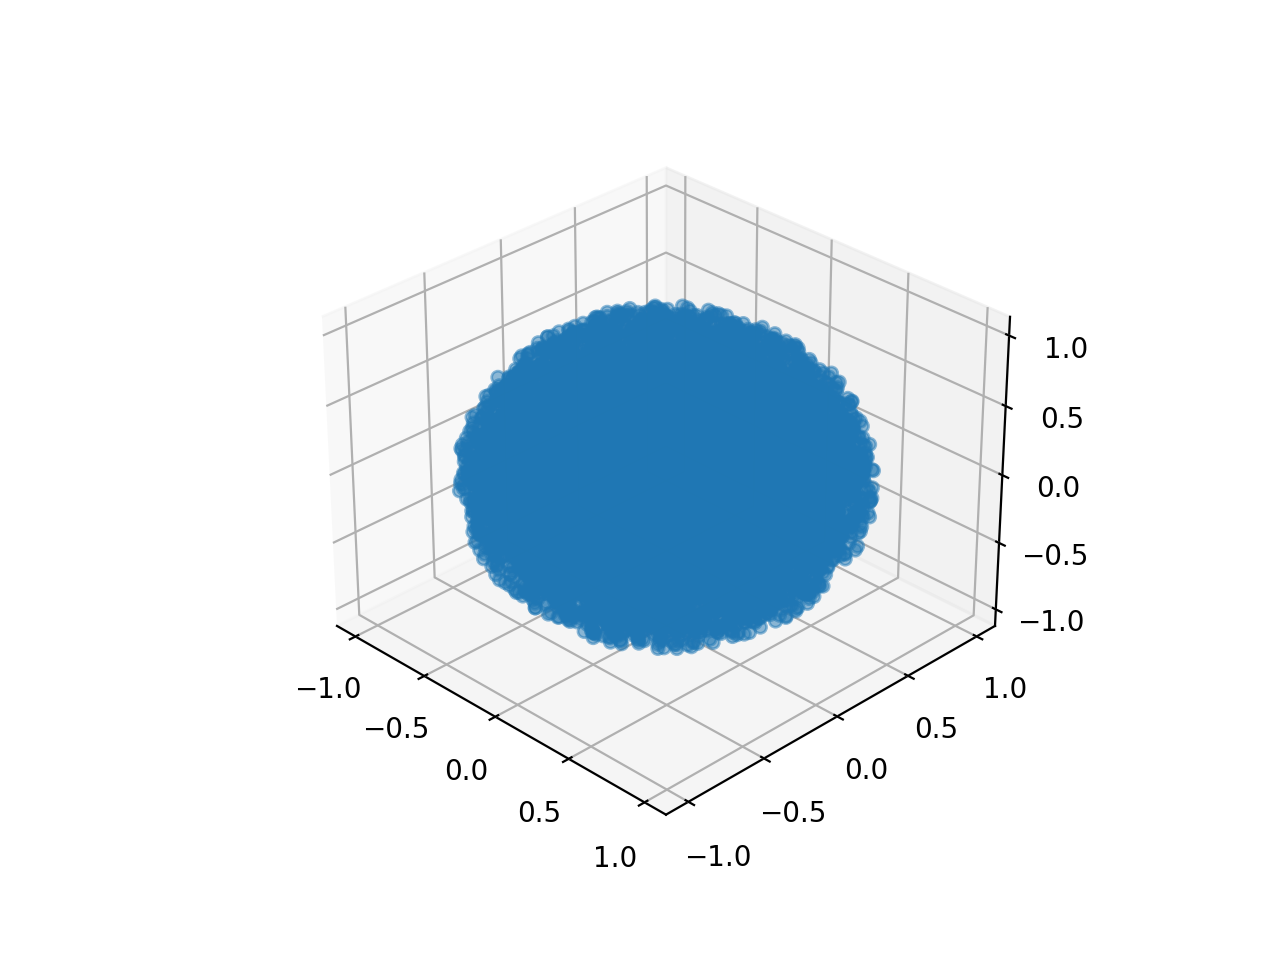

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib notebook

# 3D plot forma
elev = 30
azim = -45

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x, y, z = data[:, 0], data[:, 1], data[:, 2]


ax.scatter(x, y, z, alpha = 0.5)


ax.view_init(elev= elev, azim = azim)

# Estimate attractor dimension of filament dynamics

In [27]:
# Load a filament dataset

import pandas as pd

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.269_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.782_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweep_widerICS_FINAL_2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/SimResults_00_.hdf5'


file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrengthSweeps_diffActivityTimeScales_FINAL/activityTime_750/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/sim_data_00_.hdf5'

fil = analysis.analysisTools(file = file)


shape_modes_file = os.path.join(fil.analysisFolder, fil.dataName[:-5]+'_ModeAmplitudes.csv')

if os.path.exists(shape_modes_file):
    df_shape_modes = pd.read_csv(shape_modes_file)

    df_shape_modes
else:
    print('Shape modes data not found!')




In [28]:
# Neglect transients

start_cycle = 100 # Number of cycles to ignore transients

start_time = start_cycle*fil.activity_timescale

start_index = next((i for i,x in enumerate(np.array(df_shape_modes['Time'])) if x>= start_time), 0)
                   
print(start_index)

df_shape_modes = df_shape_modes.drop(labels = range(0,start_index))

df_shape_modes

15000


,Unnamed: 0,Time,Mode 1 amplitude,Mode 2 amplitude,Mode 3 amplitude,Mode 4 amplitude,Mode 5 amplitude
15000,15000,75000.0,2.596746e-08,7.870074e-09,-2.770174e-09,-2.310037e-11,3.125541e-10
15001,15001,75005.0,2.596699e-08,7.871994e-09,-2.769813e-09,-2.155682e-11,3.147527e-10
15002,15002,75010.0,2.596463e-08,7.866067e-09,-2.768922e-09,-1.735261e-11,3.143091e-10
15003,15003,75015.0,2.596038e-08,7.852173e-09,-2.767611e-09,-1.332651e-11,3.127365e-10
15004,15004,75020.0,2.595506e-08,7.832494e-09,-2.767333e-09,-1.049696e-11,3.099447e-10
...,...,...,...,...,...,...,...
37496,37496,187480.0,3.245998e-08,1.030863e-08,-5.393336e-09,1.280433e-10,-6.586045e-10
37497,37497,187485.0,3.245998e-08,1.030864e-08,-5.393330e-09,1.280420e-10,-6.585804e-10
37498,37498,187490.0,3.245998e-08,1.030865e-08,-5.393324e-09,1.280409e-10,-6.585574e-10
37499,37499,187495.0,3.245998e-08,1.030867e-08,-5.393319e-09,1.280397e-10,-6.585354e-10


<IPython.core.display.Javascript object>


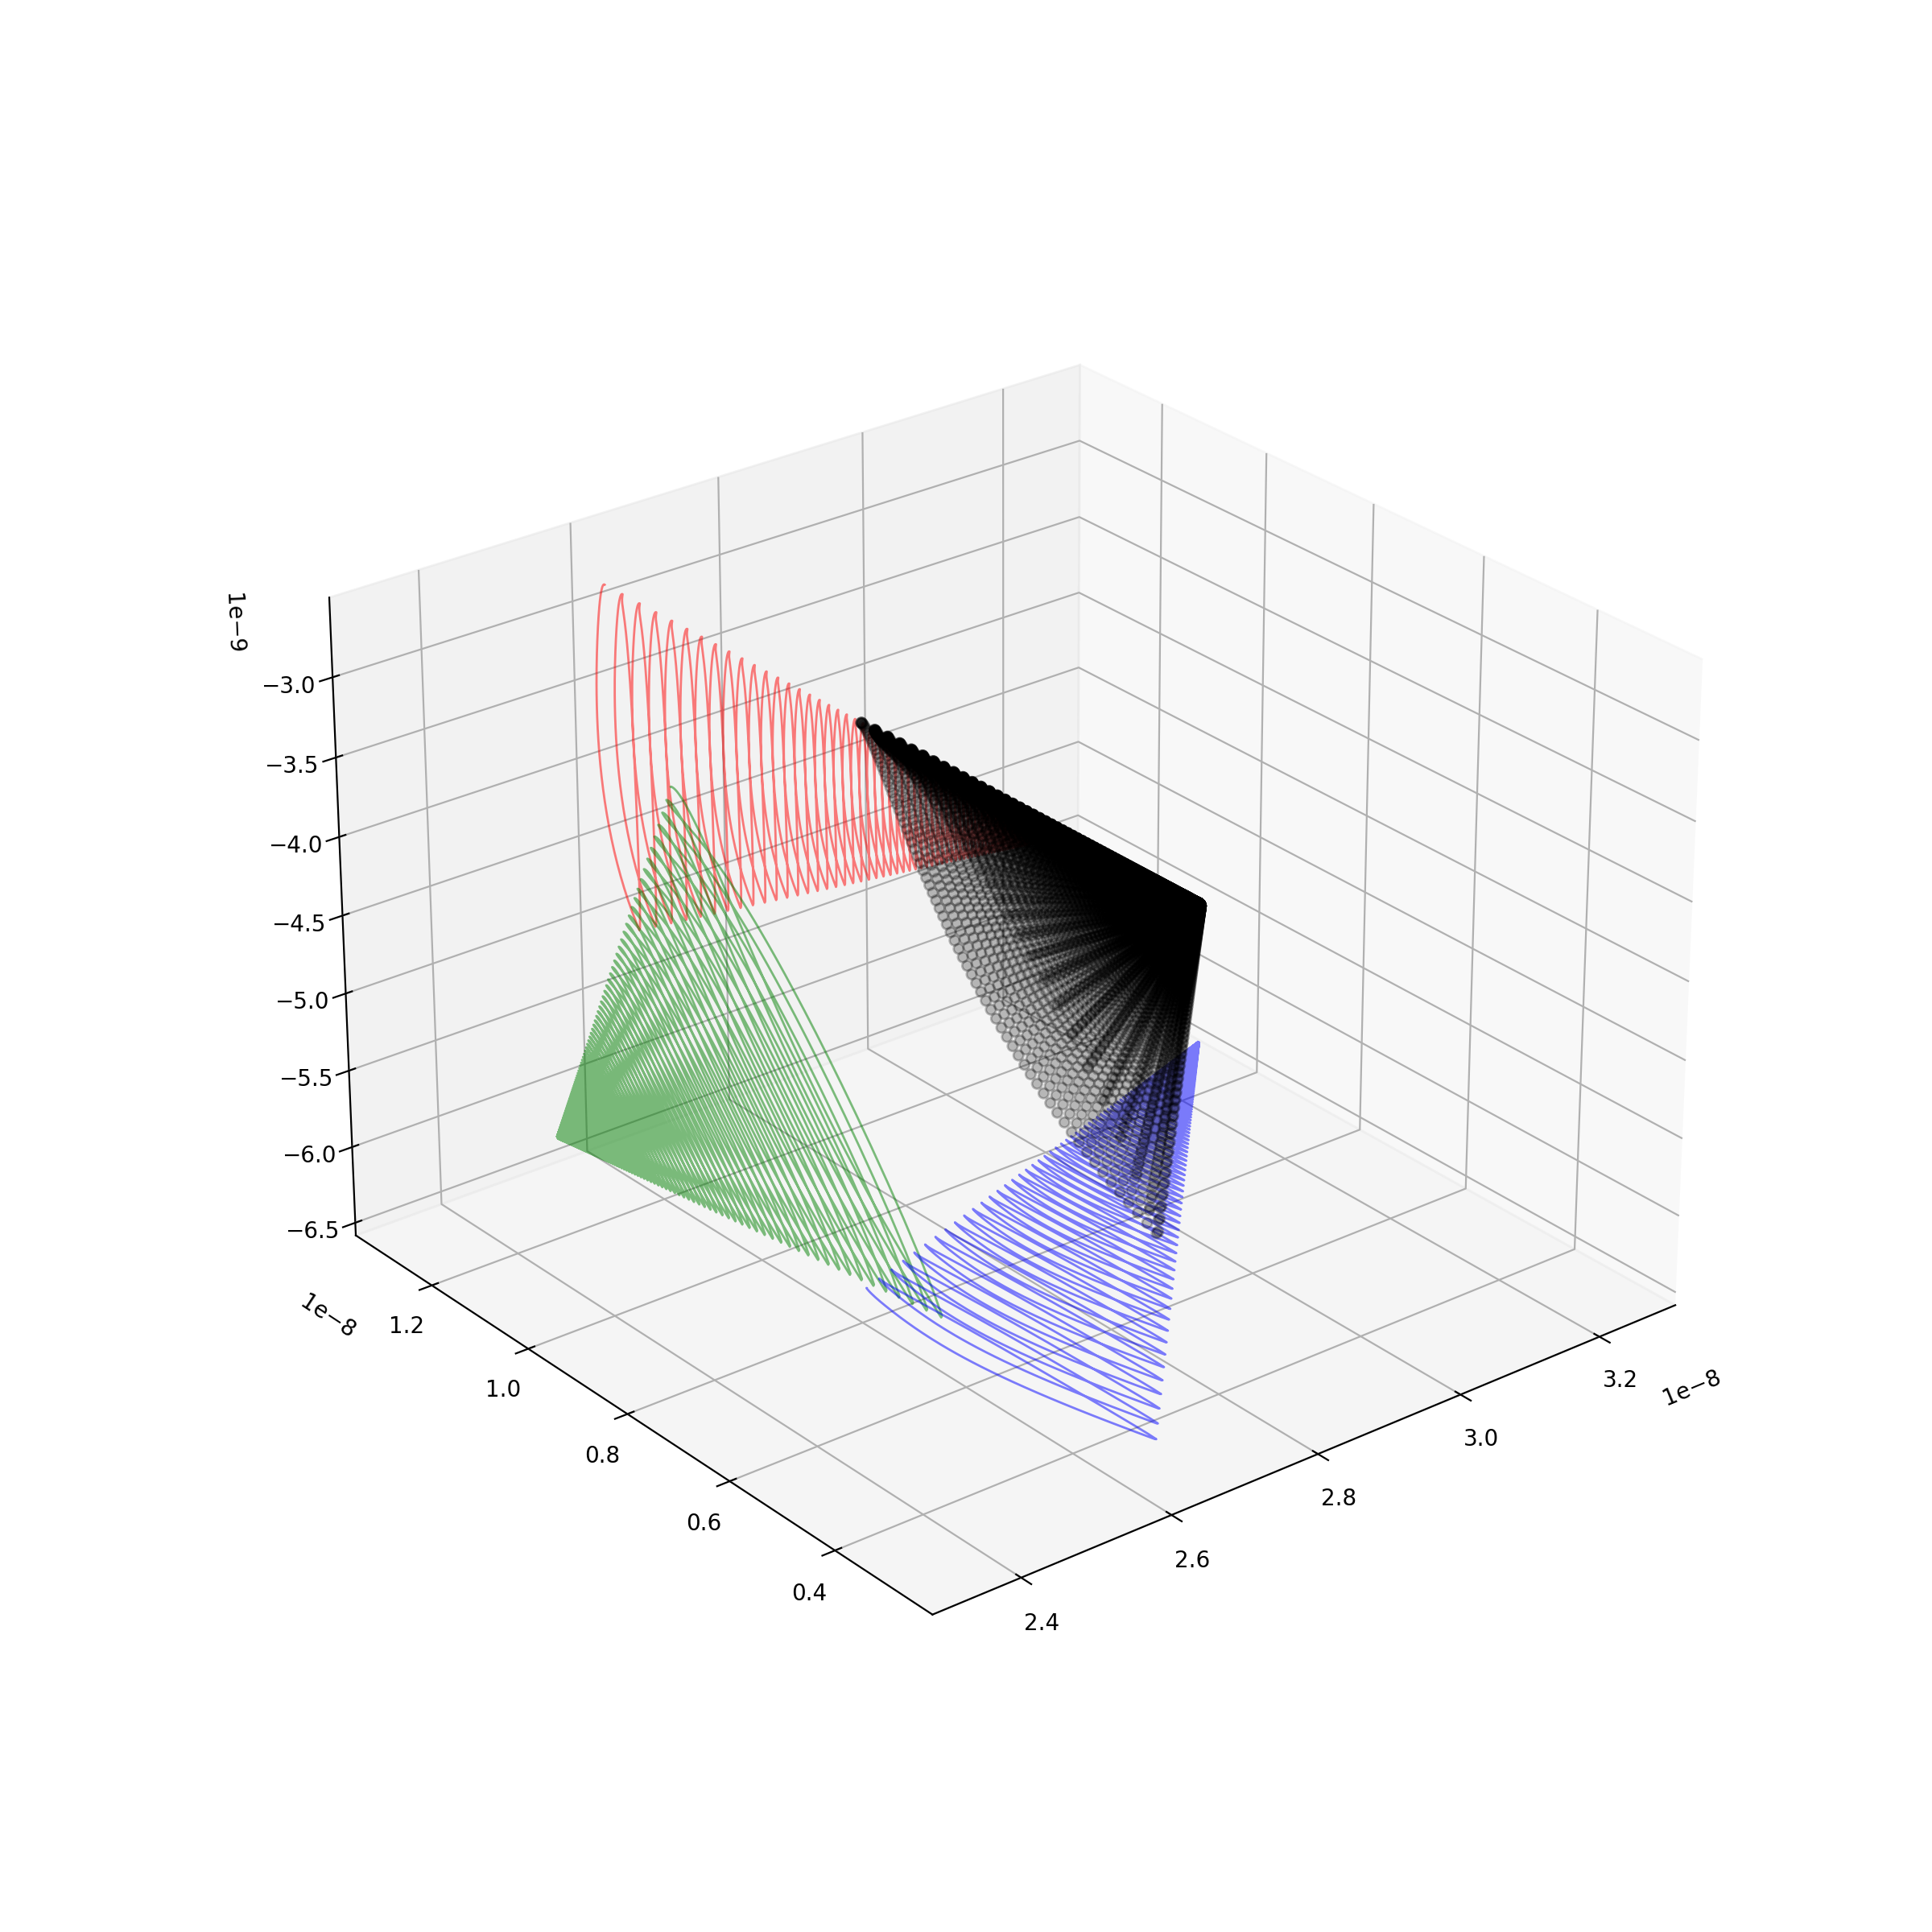

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# Plot the shape of the attractor
mode_1, mode_2, mode_3 = np.array(df_shape_modes['Mode 1 amplitude'][:]), np.array(df_shape_modes['Mode 2 amplitude'][:]), np.array(df_shape_modes['Mode 3 amplitude'][:])

Nt = len(mode_1)


%matplotlib notebook
plt.style.use('default')



x = mode_1
y = mode_2
z = mode_3

x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
z_min, z_max = np.min(z), np.max(z)

x_extent, y_extent, z_extent = x_max - x_min, y_max - y_min, z_max - z_min

scale_factor = 0.35
x_min, x_max = x_min - scale_factor*x_extent, x_max + scale_factor*x_extent
y_min, y_max = y_min - scale_factor*y_extent, y_max + scale_factor*y_extent
z_min, z_max = z_min - scale_factor*z_extent, z_max + scale_factor*z_extent

# 3D plot formatting
elev = 30
azim = -45

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, z, 'r', zdir='y', zs= y_max, linewidth = 1, alpha = 0.5)
ax.plot(y, z, 'g', zdir='x', zs= x_min, linewidth = 1,  alpha = 0.5)
ax.plot(x, y, 'b', zdir='z', zs= z_min, linewidth = 1,  alpha = 0.5)

ax.scatter(x, y, z, color = 'k', alpha = 0.25)

In [31]:
array_len = len(df_shape_modes)

mode_amp_array = np.zeros((array_len,5))

mode_amp_array[:,0] = df_shape_modes['Mode 1 amplitude']
mode_amp_array[:,1] = df_shape_modes['Mode 2 amplitude']
mode_amp_array[:,2] = df_shape_modes['Mode 3 amplitude']
mode_amp_array[:,3] = df_shape_modes['Mode 4 amplitude']
mode_amp_array[:,4] = df_shape_modes['Mode 5 amplitude']


corr_dim = skdim.id.CorrInt().fit(mode_amp_array)
corr_dim.dimension_

1.5395501002197265

In [32]:
corr_dim = skdim.id.CorrInt().fit_pw(mode_amp_array)
corr_dim.dimension_

0.8425153528127827